In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Audio
import warnings

In [2]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set aesthetic style for plots
plt.style.use('fivethirtyeight')
sns.set_palette("viridis")

In [6]:
import os

# Check the current working directory
print("Current working directory:", os.getcwd())

# Update the file path if necessary
# file_path = 'data/kaagle/music_info.csv' -> Local path
music_info_path = '../data/kaagle/music_info.csv'
# music_info_path = '/kaggle/input/million-song-dataset-spotify-lastfm/Music Info.csv'
user_history_path = "../data/kaagle/user_listening_history.csv"
# user_history_path = "/kaggle/input/million-song-dataset-spotify-lastfm/User Listening History.csv"

music_info, user_history = None, None

# Check if the file exists
if os.path.exists(music_info_path) or os.path.exists(user_history_path):
    # Read the CSV file into a DataFrame
    music_info = pd.read_csv(music_info_path)
    user_history = pd.read_csv(user_history_path)
    
    print("✅✅ Data loaded successfully.✅✅ ")
else:
    print(f"File not found: {music_info_path} or {user_history_path}. Please check the file path.")

Current working directory: c:\Users\mecha\Documents\lhydra-hybrid\notebooks
✅✅ Data loaded successfully.✅✅ 


In [7]:
display(music_info.head(5))
display(user_history.head(5))

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [8]:
print("="*50)
print("DATA OVERVIEW")
print("="*50)

DATA OVERVIEW


# DATA OVERVIEW

## Examine user history data

In [9]:

print("\nUser History Dataset:")
print(f"Shape: {user_history.shape}")
print("\nFirst few rows:")
print(user_history.head())
print("\nData types:")
print(user_history.dtypes)


User History Dataset:
Shape: (9711301, 3)

First few rows:
             track_id                                   user_id  playcount
0  TRIRLYL128F42539D1  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
1  TRFUPBA128F934F7E1  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
2  TRLQPQJ128F42AA94F  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
3  TRTUCUY128F92E1D24  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
4  TRHDDQG12903CB53EE  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1

Data types:
track_id     object
user_id      object
playcount     int64
dtype: object


## Check for missing values

In [10]:

print("\n"+"="*50)
print("MISSING VALUE ANALYSIS")
print("="*50)
print("\nMissing values in User History:")
print(user_history.isnull().sum())
print("\nMissing values in Music Info:")
print(music_info.isnull().sum())


MISSING VALUE ANALYSIS

Missing values in User History:
track_id     0
user_id      0
playcount    0
dtype: int64

Missing values in Music Info:
track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64


## Merge the datasets

In [11]:

print("\n"+"="*50)
print("MERGING DATASETS")
print("="*50)
merged_data = pd.merge(user_history, music_info, on='track_id', how='inner')


MERGING DATASETS


In [12]:
merged_data.head(100)

,track_id,user_id,playcount,name,artist,spotify_preview_url,spotify_id,tags,genre,year,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Nothing From Nothing,Billy Preston,https://p.scdn.co/mp3-preview/340c79f3f19b448e...,0d42LKqrWFVu05jAv9mwwE,"soul, funk, piano, 70s, oldies",RnB,2010,...,9,-5.206,0,0.0276,0.58500,0.055000,0.3310,0.939,102.792,4
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Paper Gangsta,Lady Gaga,https://p.scdn.co/mp3-preview/5d27f0eb10363c13...,079ZOccLpNsrEiKBaiTrqI,"electronic, pop, female_vocalists, dance, pian...",Pop,2012,...,10,-9.344,0,0.0579,0.80400,0.782000,0.1050,0.800,100.002,4
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Soy,Gipsy Kings,https://p.scdn.co/mp3-preview/a103c32c238829f9...,1D3gFdVhv8iJNMTih2Geq3,guitar,NaN,2003,...,5,-11.647,1,0.0673,0.69200,0.000002,0.1100,0.851,104.518,4
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Stacked Actors,Foo Fighters,https://p.scdn.co/mp3-preview/d7350c743c3d917f...,1vziI0NCJKrqKiG94COHBa,"rock, alternative, alternative_rock, hard_rock...",Rock,1999,...,7,-5.145,1,0.0500,0.00203,0.001020,0.2340,0.670,134.898,4
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Heaven's Gonna Burn Your Eyes,Thievery Corporation,https://p.scdn.co/mp3-preview/c7f3b22fb4a680f0...,4SnH0V1cnEPUqMSzgDlxKb,"electronic, female_vocalists, ambient, chillou...",Electronic,2002,...,9,-9.812,1,0.0286,0.63500,0.521000,0.0637,0.323,152.411,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TRBMCGS128F92D2C27,17aa9f6dbdf753831da8f38c71b66b64373de613,5,Innocent When You Dream (78),Tom Waits,https://p.scdn.co/mp3-preview/f9f77b3ed41f76c7...,2UZzbyTxmeuVtBA8OrFerz,"alternative, singer_songwriter, blues",Rock,1987,...,5,-19.836,1,0.0527,0.98200,0.972000,0.4240,0.222,136.049,4
96,TRJNMNC128F427ED16,17aa9f6dbdf753831da8f38c71b66b64373de613,1,Your Secrets,Belle and Sebastian,https://p.scdn.co/mp3-preview/bd4b8406b11ab7a5...,0FUpLggWrnfOzlYa5tLiLZ,indie,Rock,2004,...,4,-6.619,1,0.0287,0.46900,0.000003,0.1120,0.847,114.529,4
97,TRWCIAX128F42925BD,17aa9f6dbdf753831da8f38c71b66b64373de613,1,What Is It About Men,Amy Winehouse,https://p.scdn.co/mp3-preview/8645797016189eb7...,0HffjFltKvymsjJzIx7v0G,"female_vocalists, jazz, soul, blues",NaN,2003,...,11,-7.042,0,0.0604,0.36200,0.000009,0.1760,0.469,76.410,4
98,TRGVKBK128F429EA2D,17aa9f6dbdf753831da8f38c71b66b64373de613,1,The Fake Headlines,The New Pornographers,https://p.scdn.co/mp3-preview/a02300b16cec9499...,2sWB1vS7iSNl3VtCFEqaDC,"pop, indie_rock",NaN,2000,...,0,-7.960,1,0.0467,0.04230,0.000028,0.1370,0.585,176.128,4


In [13]:
print(f"\nMerged data shape: {merged_data.shape}")



Merged data shape: (9711301, 23)


## Description of audio features

In [14]:
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                 'speechiness', 'acousticness', 'instrumentalness', 
                 'liveness', 'valence', 'tempo', 'time_signature']

print("\nAudio features summary statistics:")
merged_data[audio_features].describe()


Audio features summary statistics:


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06
mean,5.286417e-01,6.781073e-01,5.351573e+00,-7.825038e+00,6.474253e-01,7.136620e-02,2.206536e-01,1.679303e-01,2.047823e-01,4.658363e-01,1.234290e+02,3.913533e+00
std,1.708274e-01,2.362942e-01,3.556024e+00,3.952011e+00,4.777717e-01,7.312056e-02,2.971524e-01,2.992913e-01,1.686200e-01,2.508728e-01,2.907696e+01,3.601450e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.130000e-01,5.230000e-01,2.000000e+00,-9.623000e+00,0.000000e+00,3.350000e-02,4.230000e-03,3.830000e-06,9.750000e-02,2.620000e-01,1.008950e+02,4.000000e+00
50%,5.320000e-01,7.250000e-01,5.000000e+00,-6.919000e+00,1.000000e+00,4.440000e-02,6.110000e-02,1.140000e-03,1.330000e-01,4.420000e-01,1.218570e+02,4.000000e+00
75%,6.480000e-01,8.810000e-01,9.000000e+00,-5.089000e+00,1.000000e+00,7.450000e-02,3.430000e-01,1.540000e-01,2.760000e-01,6.710000e-01,1.420110e+02,4.000000e+00
max,9.860000e-01,1.000000e+00,1.100000e+01,3.642000e+00,1.000000e+00,9.540000e-01,9.960000e-01,9.990000e-01,9.980000e-01,9.890000e-01,2.388950e+02,5.000000e+00


## Visualize the distribution of audio features

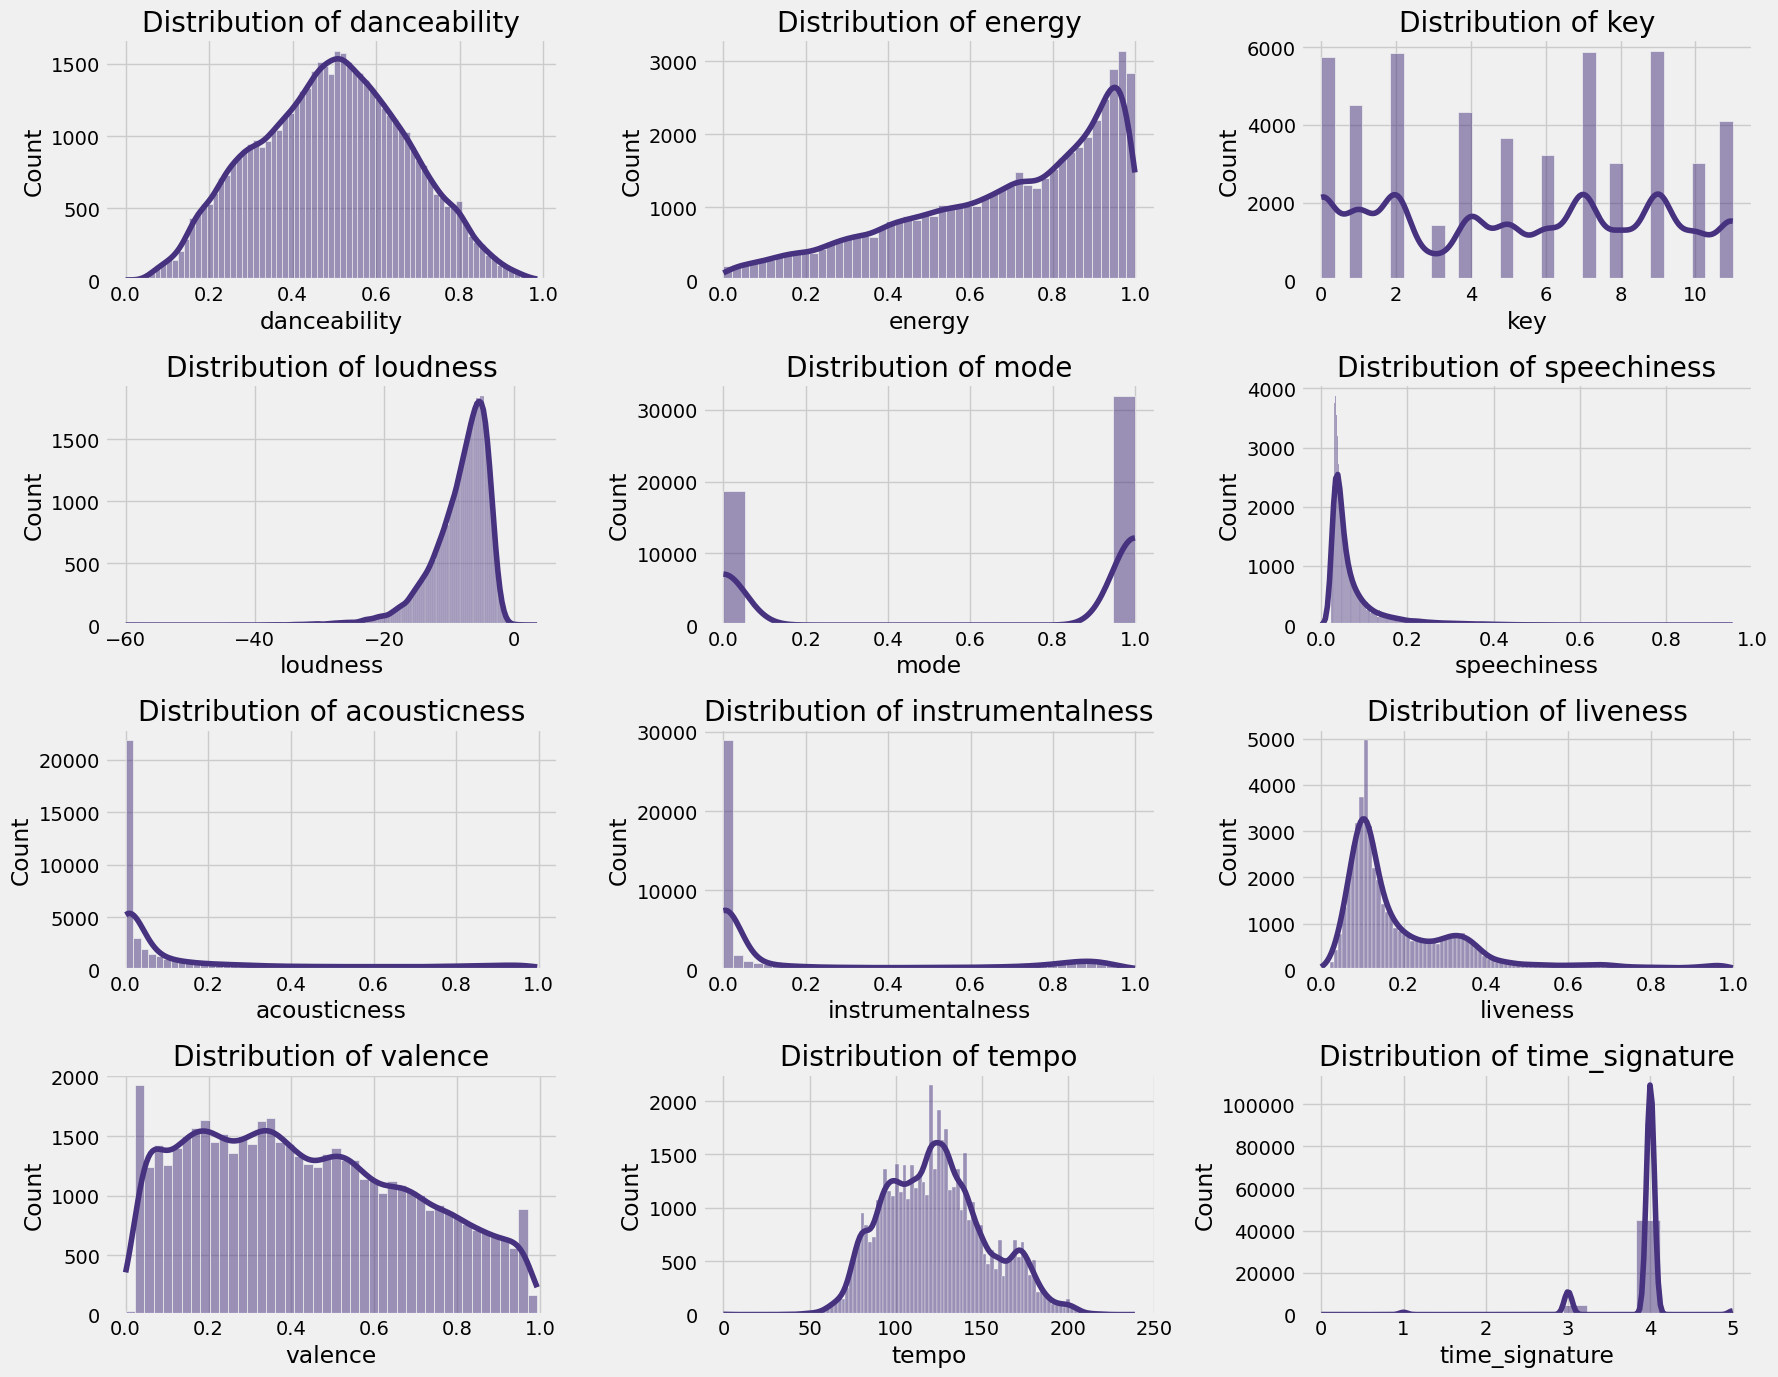

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(18, 14))
axes = axes.flatten()

for i, feature in enumerate(audio_features):
    sns.histplot(music_info[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.savefig('audio_features_distribution.png')

## Correlation between audio features


CORRELATION ANALYSIS


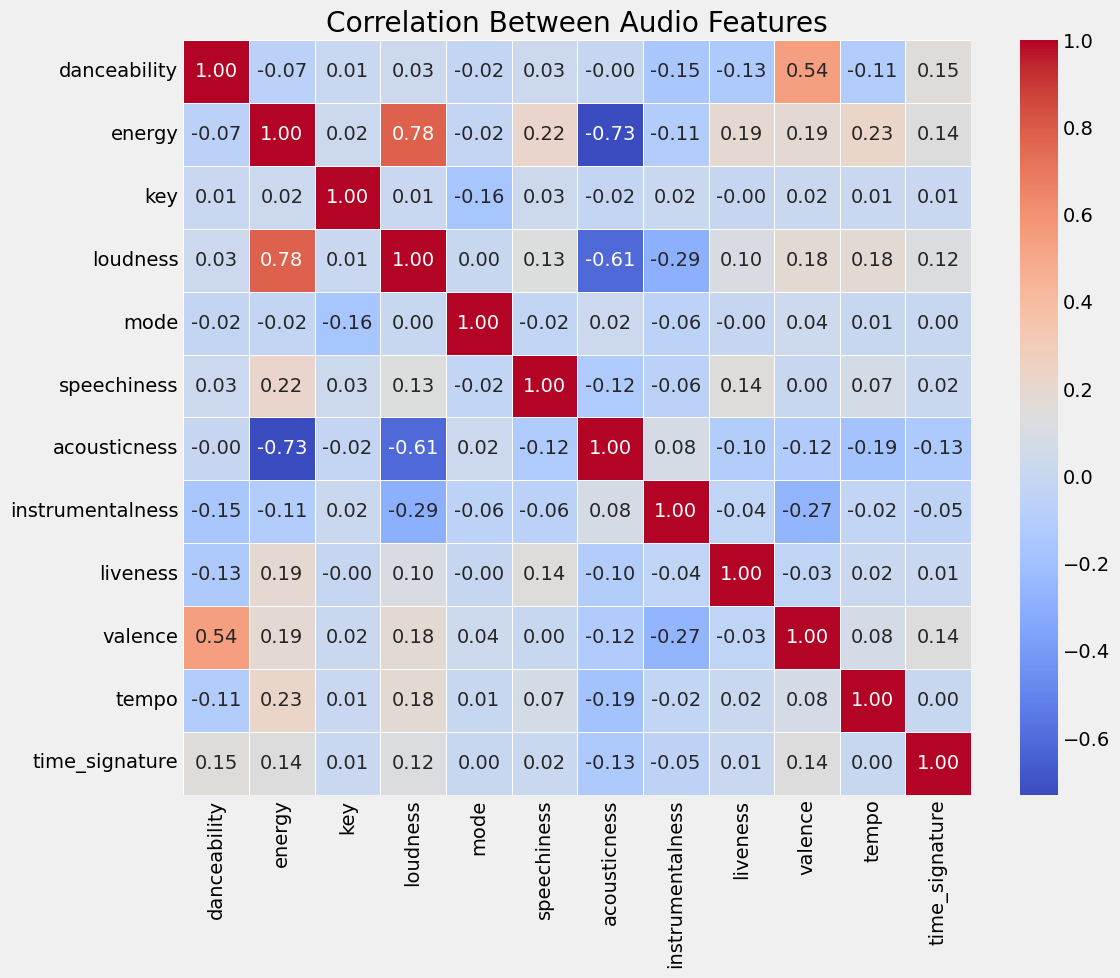

In [16]:
print("\n"+"="*50)
print("CORRELATION ANALYSIS")
print("="*50)

corr = music_info[audio_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Audio Features')
plt.tight_layout()
plt.savefig('audio_features_correlation.png')

## Explore genre distribution

In [17]:

print("\n"+"="*50)
print("GENRE ANALYSIS")
print("="*50)

# Extract genres from tags
def extract_genres(tags):
    if pd.isna(tags):
        return []
    return [tag.strip() for tag in tags.split(',')]

# Create a list of all genres
all_genres = []
for tags in music_info['tags']:
    if pd.notna(tags):
        all_genres.extend(extract_genres(tags))
        
# Count genre occurrences
genre_counts = pd.Series(all_genres).value_counts()
print("\nTop 15 genres:")
genre_counts.head(15)


GENRE ANALYSIS

Top 15 genres:


rock                 10684
indie                 7287
electronic            6594
alternative           6274
pop                   4651
female_vocalists      4517
alternative_rock      4137
indie_rock            3801
metal                 3181
classic_rock          2779
singer_songwriter     2747
experimental          2678
chillout              2655
ambient               2561
folk                  2530
Name: count, dtype: int64

## Visualize top genres

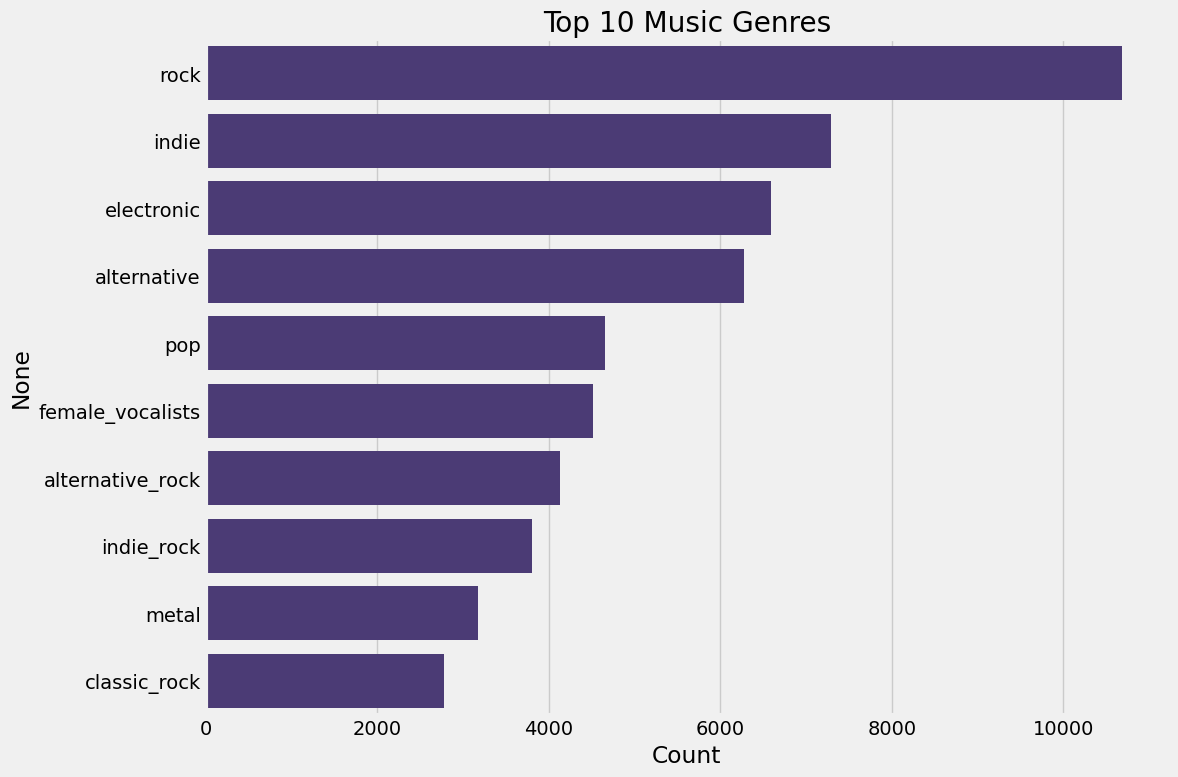

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index)
plt.title('Top 10 Music Genres')
plt.xlabel('Count')
plt.tight_layout()
plt.savefig('top_genres.png')

## Year distribution analysis


TEMPORAL ANALYSIS

Year distribution summary:
count    50683.000000
mean      2004.017323
std          8.860172
min       1900.000000
25%       2001.000000
50%       2006.000000
75%       2009.000000
max       2022.000000
Name: year, dtype: float64


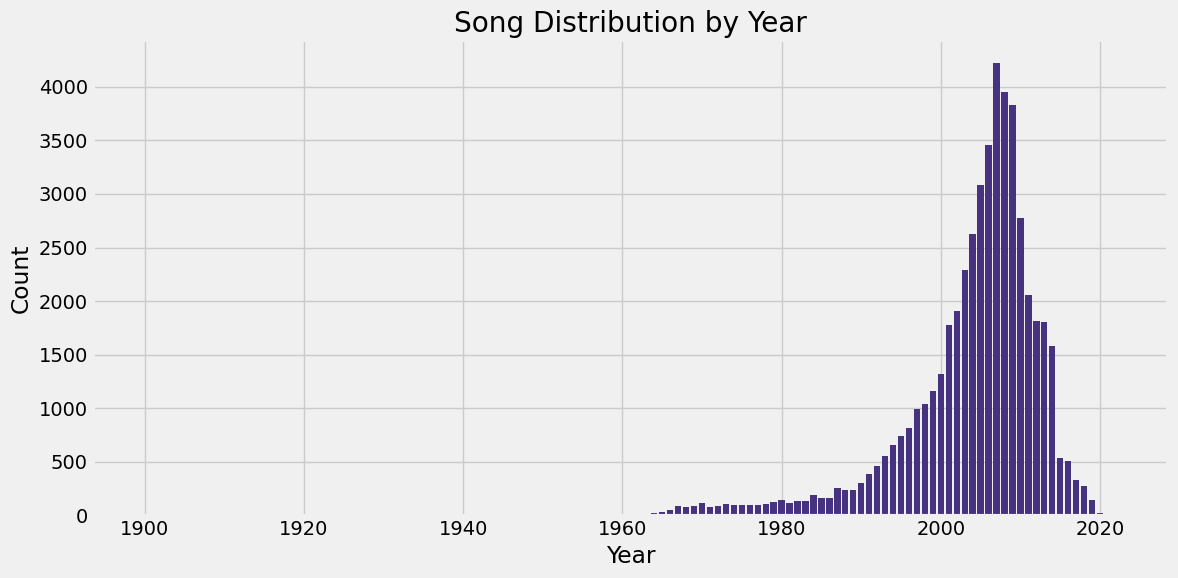

In [19]:

print("\n"+"="*50)
print("TEMPORAL ANALYSIS")
print("="*50)

if 'year' in music_info.columns:
    plt.figure(figsize=(12, 6))
    year_counts = music_info['year'].value_counts().sort_index()
    plt.bar(year_counts.index, year_counts.values)
    plt.title('Song Distribution by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('songs_by_year.png')
    print("\nYear distribution summary:")
    print(music_info['year'].describe())

## Relationship between audio features and playcount


PLAYCOUNT vs AUDIO FEATURES


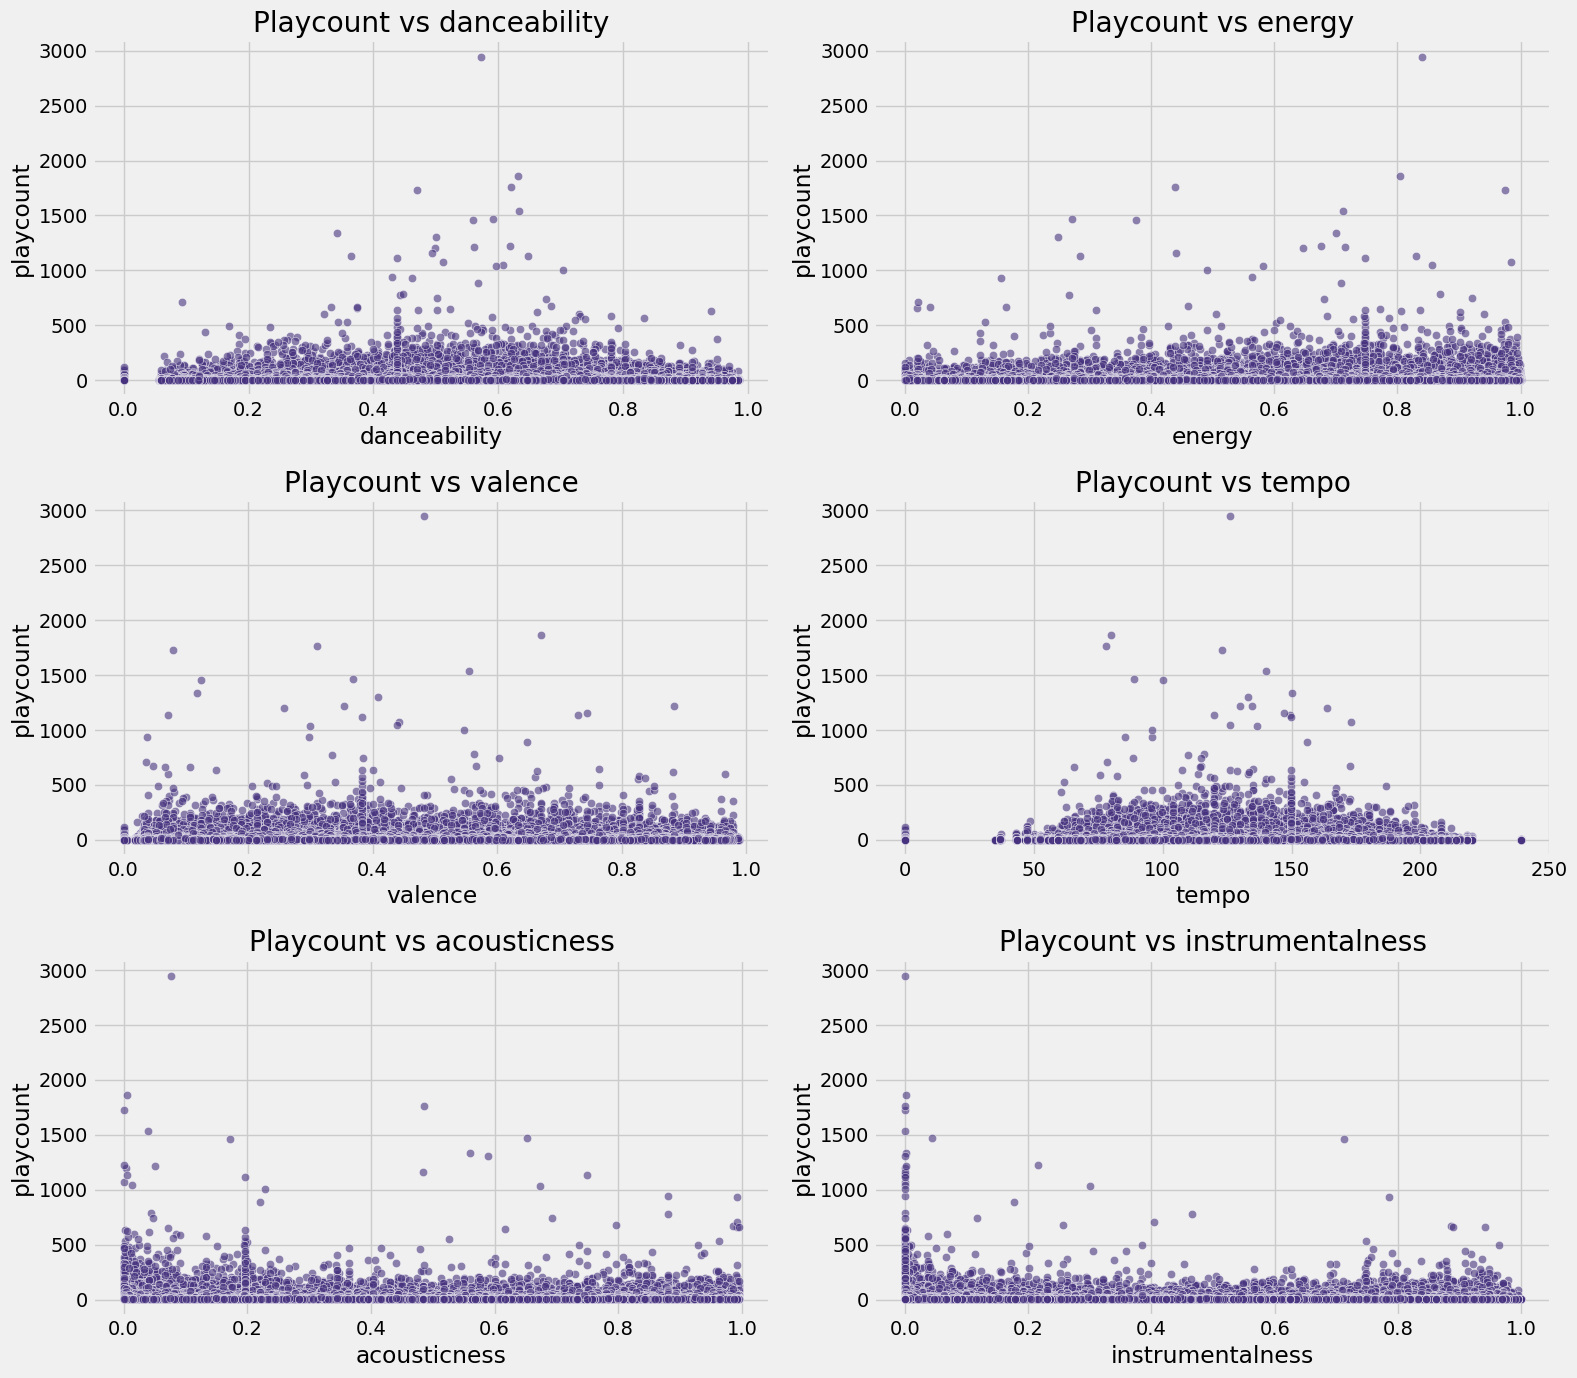

In [20]:

print("\n"+"="*50)
print("PLAYCOUNT vs AUDIO FEATURES")
print("="*50)

# Set up the subplots for key audio features vs. playcount
features_to_plot = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness']
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.scatterplot(x=feature, y='playcount', data=merged_data, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Playcount vs {feature}')

plt.tight_layout()
plt.savefig('playcount_vs_features.png')

## Cluster analysis based on audio features


CLUSTERING ANALYSIS


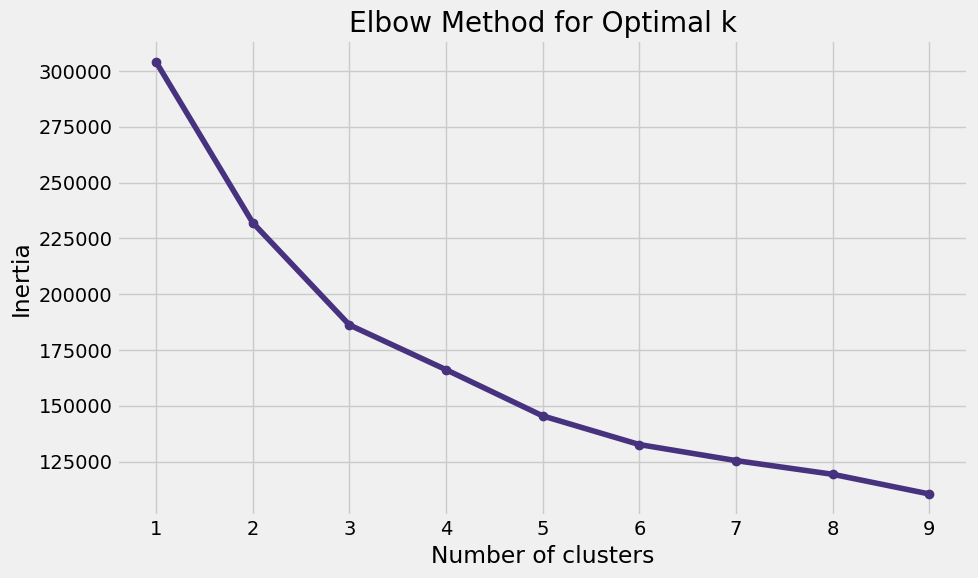

In [21]:
print("\n"+"="*50)
print("CLUSTERING ANALYSIS")
print("="*50)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select features for clustering
cluster_features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'tempo']
cluster_data = music_info[cluster_features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Determine optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.savefig('elbow_curve.png')

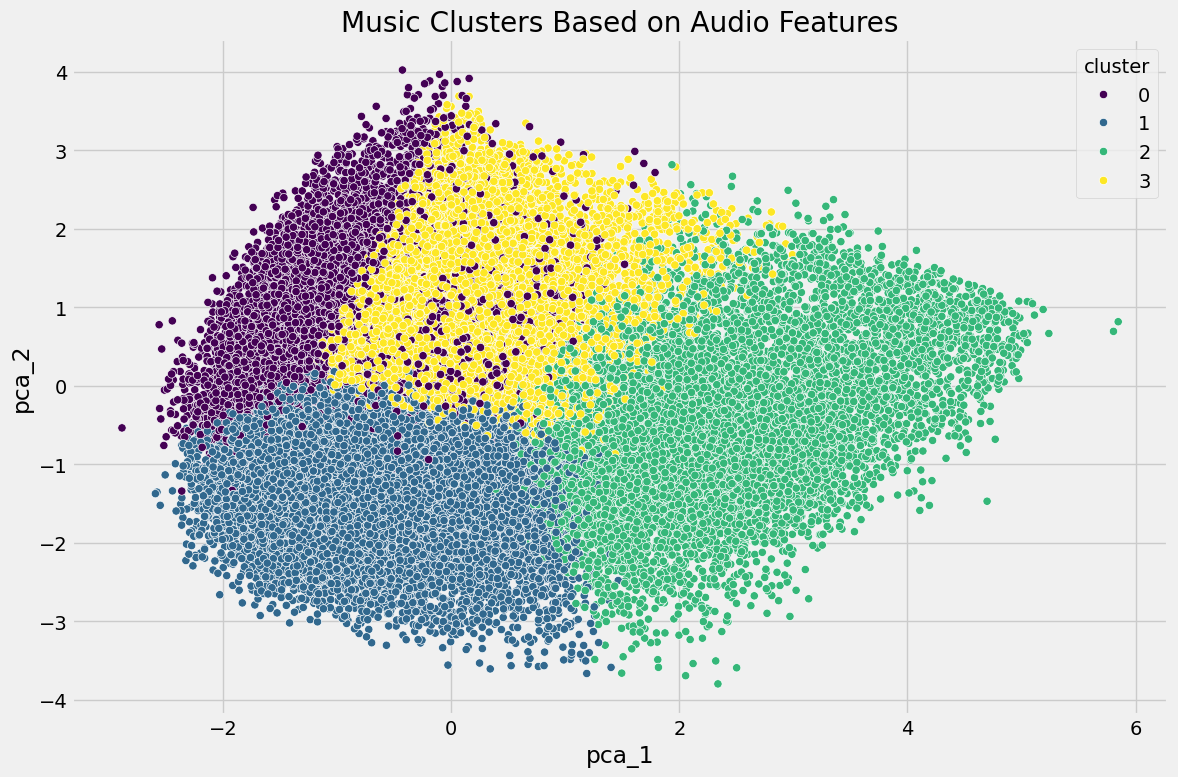

In [22]:
# Apply K-means clustering with the optimal number of clusters (let's say 4 for this example)
optimal_k = 4  # You can adjust this based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data
cluster_data['cluster'] = cluster_labels

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
cluster_data['pca_1'] = pca_result[:, 0]
cluster_data['pca_2'] = pca_result[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=cluster_data, palette='viridis')
plt.title('Music Clusters Based on Audio Features')
plt.tight_layout()
plt.savefig('music_clusters.png')

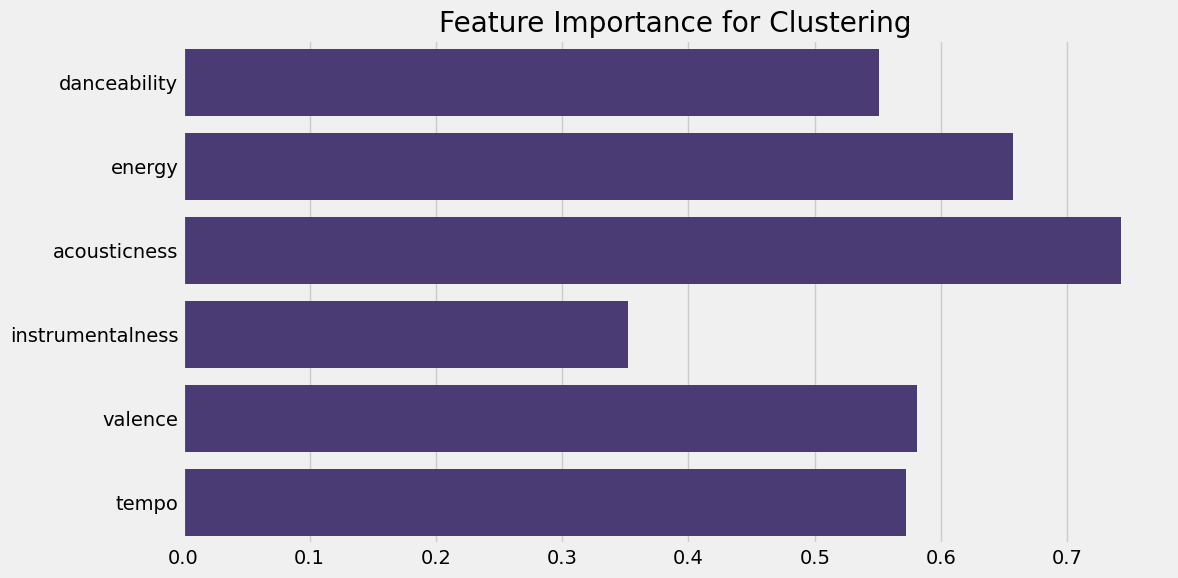

In [23]:
# Feature importances for clustering
cluster_centers = kmeans.cluster_centers_
feature_importance = abs(cluster_centers)
feature_importance = feature_importance.mean(axis=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=cluster_features)
plt.title('Feature Importance for Clustering')
plt.tight_layout()
plt.savefig('feature_importance.png')

## User behavior analysis


USER BEHAVIOR ANALYSIS

User playcount statistics:
count    962037.000000
mean         26.558139
std          44.130748
min           1.000000
25%           5.000000
50%          12.000000
75%          30.000000
max        2953.000000
Name: playcount, dtype: float64

Top 10 tracks by playcount:
                        name             artist  playcount
20476                Revelry      Kings of Leon     527893
976                Alejandro          Lady Gaga     111615
9317                   Gears         Miss May I     111596
10262                   Halo       Depeche Mode      91461
3649        Bring Me To Life  Katherine Jenkins      91448
10618     Heartbreak Warfare         John Mayer      87745
28094               Uprising            Sabaton      87050
8679                Float On       Modest Mouse      85079
18905    Party In The U.S.A.  The Barden Bellas      78443
2941   Bitter Sweet Symphony          The Verve      76893


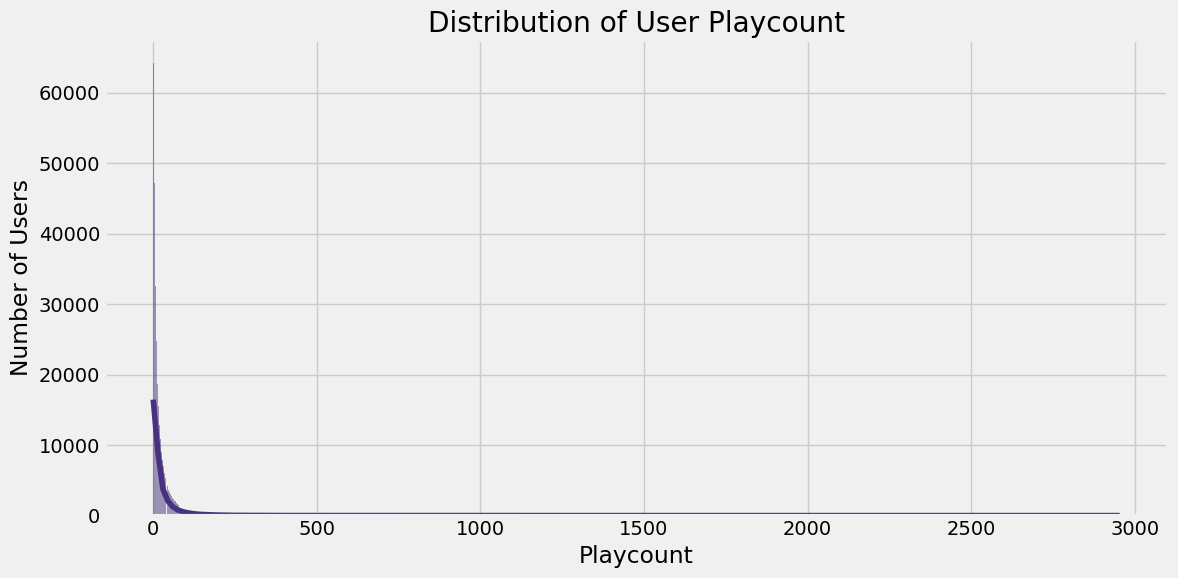

In [24]:
print("\n"+"="*50)
print("USER BEHAVIOR ANALYSIS")
print("="*50)

if len(user_history) > 1:  # Only perform if we have sufficient user data
    # Analyze user activity patterns
    user_playcount = user_history.groupby('user_id')['playcount'].sum().reset_index()
    user_playcount = user_playcount.sort_values('playcount', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.histplot(user_playcount['playcount'], kde=True)
    plt.title('Distribution of User Playcount')
    plt.xlabel('Playcount')
    plt.ylabel('Number of Users')
    plt.tight_layout()
    plt.savefig('user_playcount_distribution.png')

    print("\nUser playcount statistics:")
    print(user_playcount['playcount'].describe())
    
    # Top tracks by playcount
    track_popularity = merged_data.groupby(['name', 'artist'])['playcount'].sum().reset_index()
    track_popularity = track_popularity.sort_values('playcount', ascending=False)
    
    print("\nTop 10 tracks by playcount:")
    print(track_popularity.head(10))

## Summary of the analysis

In [25]:
print("\n"+"="*50)
print("SUMMARY AND RECOMMENDATIONS")
print("="*50)
print("""
Based on the exploratory data analysis, we can derive the following insights for the two-tower neural network architecture:

1. User-side tower should incorporate:
   - User listening patterns
   - Historical playcount distribution
   - Temporal preferences

2. Music-side tower should incorporate:
   - Audio features with emphasis on the most distinguishing characteristics
   - Genre information extracted from tags
   - Year/era of release

3. Potential embedding strategies:
   - Combined embeddings of audio features and genre tags
   - Separate embeddings for temporal patterns
   - User embedding based on listening history

4. Model considerations:
   - The correlation between audio features indicates potential for dimensionality reduction
   - The clustering analysis identifies natural groupings in music that can be leveraged
   - Consider seasonal/temporal patterns in recommendations

This analysis provides a foundation for building an effective two-tower neural network architecture for personalized music recommendations.
""")


SUMMARY AND RECOMMENDATIONS

Based on the exploratory data analysis, we can derive the following insights for the two-tower neural network architecture:

1. User-side tower should incorporate:
   - User listening patterns
   - Historical playcount distribution
   - Temporal preferences

2. Music-side tower should incorporate:
   - Audio features with emphasis on the most distinguishing characteristics
   - Genre information extracted from tags
   - Year/era of release

3. Potential embedding strategies:
   - Combined embeddings of audio features and genre tags
   - Separate embeddings for temporal patterns
   - User embedding based on listening history

4. Model considerations:
   - The correlation between audio features indicates potential for dimensionality reduction
   - The clustering analysis identifies natural groupings in music that can be leveraged
   - Consider seasonal/temporal patterns in recommendations

This analysis provides a foundation for building an effective two-tow